# **Problem Statement :**
This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.

# **Step 1 : Import Libraries**

In [48]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 2 : Import Dataset**

In [49]:
stock = pd.read_csv('S&P500_Stock_Data.csv')

In [50]:
stock.head(5)

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [51]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764327
max,3.000000,70.000000,3000.000000


In [52]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


# **Step 3 : Visualize dataset**

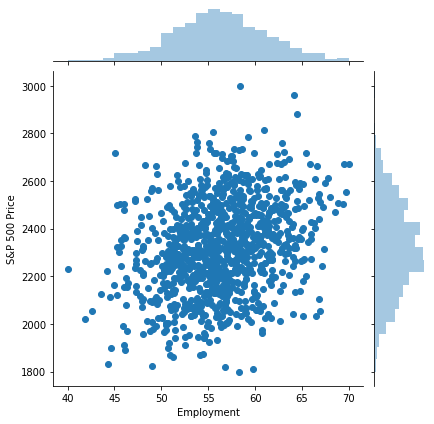

In [53]:
sns.jointplot( x = 'Employment', y = 'S&P 500 Price', data = stock)

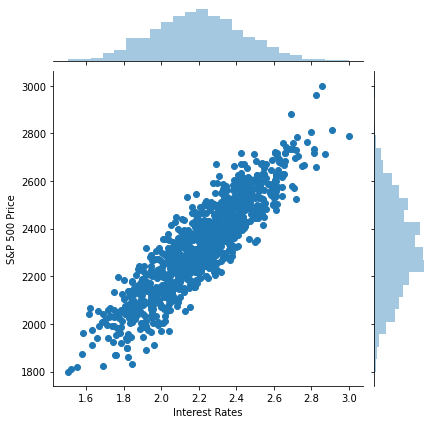

In [54]:
sns.jointplot( x = 'Interest Rates', y = 'S&P 500 Price', data = stock)

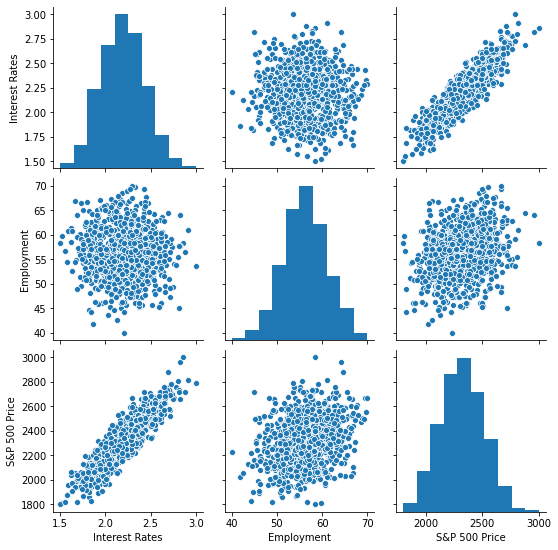

In [55]:
sns.pairplot(stock)

# **Step 4 : Split into Training and Test dataset**

In [56]:
y = stock ['S&P 500 Price']

In [57]:
y

0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
          ...     
995    2578.699184
996    2573.865933
997    2004.911218
998    2344.098981
999    2156.133786
Name: S&P 500 Price, Length: 1000, dtype: float64

In [58]:
X = stock[['Interest Rates', 'Employment']]

In [59]:
X

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492
...,...,...
995,2.528420,52.390828
996,2.643571,54.626204
997,2.009644,57.004357
998,2.201656,62.447790


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [61]:
X_train

,Interest Rates,Employment
825,2.507873,59.593532
299,2.206933,59.367308
144,2.333039,65.778933
794,1.982555,65.943832
439,2.556872,53.249842
...,...,...
880,2.192705,52.889403
686,2.280712,62.811321
679,2.085907,56.790846
832,2.316112,63.972056


In [62]:
X_test

,Interest Rates,Employment
390,1.979698,51.031024
641,2.223330,65.069599
863,2.210034,61.449739
102,2.115136,51.082923
822,1.747157,57.161724
...,...,...
984,1.990452,52.511023
762,2.294688,57.731155
315,2.161489,67.268251
477,2.304167,53.670590


# **Step 5 : Train the model**

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
regressor = LinearRegression(fit_intercept = True) # True will not force the line to pass from origin

In [65]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
print('Linear Model Coefficients (m)', regressor.coef_)
print('Linear Model Coefficients (b)', regressor.intercept_)

Linear Model Coefficients (m) [720.60347796  12.03351616]
Linear Model Coefficients (b) 62.32454960224868


# **Step 6 : Test the model**

In [67]:
y_predict = regressor.predict(X_test)
y_predict

array([2102.98456002, 2447.47993102, 2394.33916138, 2201.20601965,
       2009.18861408, 2078.98875842, 2298.50532977, 2042.66070261,
       2362.64625818, 2187.6274486 , 2316.27474723, 2486.52318713,
       2405.85102324, 2031.34305056, 2187.3423972 , 2239.42843738,
       2324.44081648, 2485.39118331, 2581.8030504 , 2391.80605264,
       2457.35930999, 2351.98964489, 2702.84578285, 2146.81987227,
       2256.34023299, 2297.37850422, 2169.89242374, 2365.30864241,
       2239.53905408, 2079.65593248, 2776.31743923, 2383.19605433,
       2630.94704183, 2256.00520545, 2102.67018962, 2485.02168323,
       2248.49388895, 2592.32568202, 2318.92911119, 2105.79338995,
       2263.34812075, 2375.75167037, 2284.80443141, 2079.39069265,
       2129.89640626, 2255.18392328, 1933.94510799, 2514.75897199,
       1978.87861753, 2058.18461182, 1996.89517107, 2283.29058101,
       2214.05741513, 2365.59744901, 2352.53222039, 2345.55051624,
       2326.12486494, 2489.22652202, 2366.96342367, 2297.25852

In [68]:
y_test

390    2124.610963
641    2401.509633
863    2409.475837
102    2230.842487
822    2056.535955
          ...     
984    2085.534307
762    2345.068890
315    2490.712759
477    2366.103052
866    2577.297431
Name: S&P 500 Price, Length: 300, dtype: float64

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

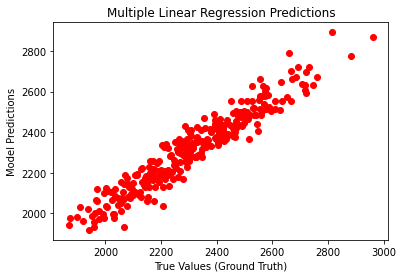

In [69]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')

# **Step 7 : Evaluate the model**

In [70]:
k = X_test.shape[1]
n = len(X_test)

In [71]:
n

300

In [72]:
k

2

In [73]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test-y_predict) / y_test))*100

In [74]:
print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

RMSE =  59.86 
MSE = 3583.2181212994565 
MAE = 47.82700901099501 
R2 = 0.9148688509513659 
Adjusted R2 = 0.9142955772203987 
MAPE = 2.08717234117495


# **Step 8 - Visualize Test set results**

In [75]:
from mpl_toolkits.mplot3d import Axes3D

In [76]:
x_surf, y_surf = np.meshgrid( np.linspace( stock['Interest Rates'].min(), stock['Interest Rates'].max(), 100),  np.linspace(stock['Employment'].min(), stock['Employment'].max() , 100))

In [77]:
x_surf.shape

(100, 100)

In [78]:
onlyX = pd.DataFrame( {'Interest Rates': x_surf.ravel(), 'Employment':y_surf.ravel()}) 

In [79]:
onlyX.shape

(10000, 2)

In [80]:
fittedY = regressor.predict(onlyX)

In [81]:
fittedY.shape

(10000,)

In [82]:
fittedY = fittedY.reshape(x_surf.shape)

In [83]:
fittedY.shape

(100, 100)

Text(0.5, 0, 'Stock index price')

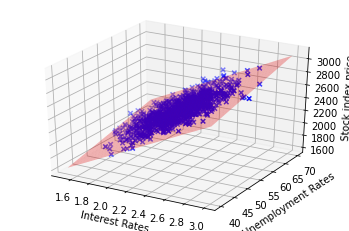

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( stock['Interest Rates'], stock['Employment'] , stock['S&P 500 Price'] , c = 'blue', marker ='x'  )
ax.plot_surface(x_surf, y_surf, fittedY, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock index price')

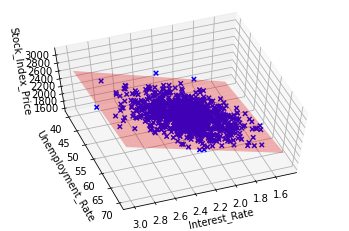

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(60, 70)
plt.show()

In [86]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Interest Rates,720.603478
Employment,12.033516
